In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

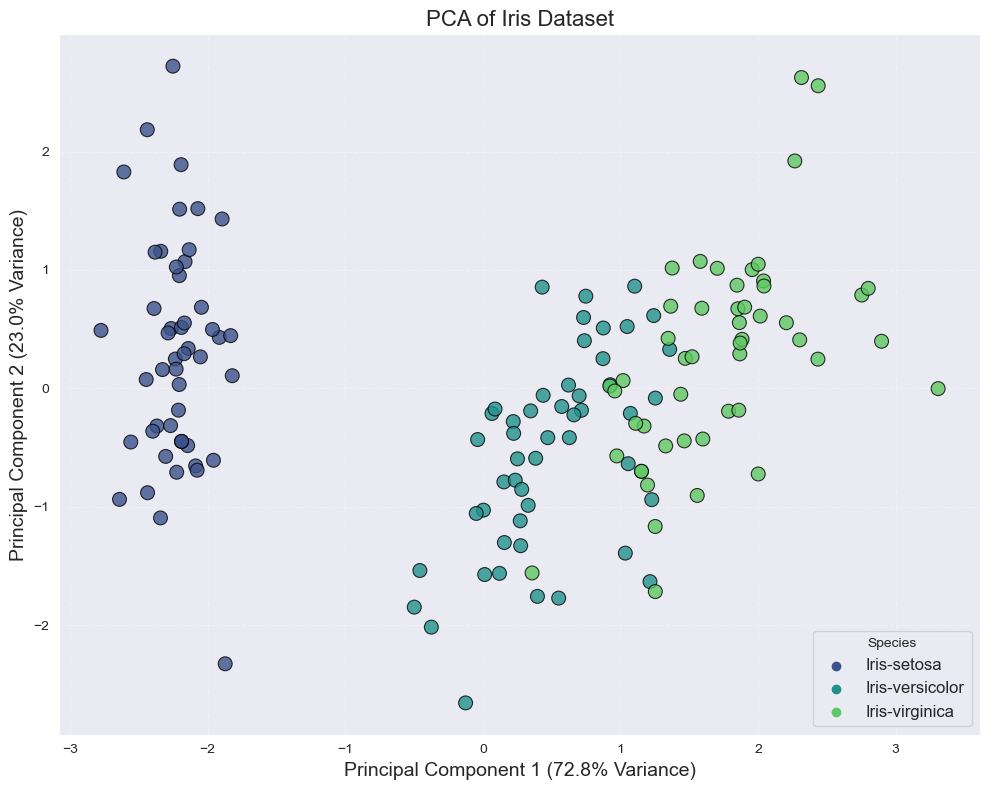

In [4]:
# Download the Iris dataset from UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv(url, names=column_names)

# Separate features and target
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components,
                      columns=['PC1', 'PC2'])
pca_df['species'] = y

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='species',
                data=pca_df, palette='viridis',
                s=100, edgecolor='k', alpha=0.8)

# Add labels and title
plt.title('PCA of Iris Dataset', fontsize=16)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.1f}% Variance)', fontsize=14)
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.1f}% Variance)', fontsize=14)
plt.legend(title='Species', fontsize=12)

# Add grid and adjust layout
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

# Save the plot to a file
plt.savefig("iris_pca.png", dpi=300, bbox_inches="tight", pad_inches=0.1)

# Show the plot
plt.show()